### Import the Necessary Packages

In [59]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load the Dataset

In [60]:
data = pd.read_excel('Data.xlsx', sheet_name='Data')

In [61]:
data.head()

,Date,XLE Closing price,XLI Closing price,S&P 500 Closing price
0,2017-11-27,67.190002,71.529999,2601.419922
1,2017-11-28,67.709999,72.620003,2627.040039
2,2017-11-29,68.080002,73.260002,2626.070068
3,2017-11-30,69.099998,74.510002,2647.580078
4,2017-12-01,69.680000,73.589996,2642.219971


### Add Daily Log Returns to the Data Set

The following is the formula that is used for calculating the daily log returns of the two ETFs and the S&P 500: 

$$ R_t = ln(\frac{P_t}{P_{t-1}}) $$

Where:

$𝑅_t$ is the log return at time $t$

$𝑃_t$ is the Close Price at time $t$

$𝑃_{t-1}$ is the Close Price at time $t-1$

In [62]:
data['XLE Ret']=np.log(data['XLE Closing price']/data['XLE Closing price'].shift(1))
data['XLI Ret']=np.log(data['XLI Closing price']/data['XLI Closing price'].shift(1))
data['S&P500 Ret']=np.log(data['S&P 500 Closing price']/data['S&P 500 Closing price'].shift(1))

In [63]:
# Drop the NaN 
data_df = data.copy()
data_df = data_df.dropna()

In [64]:
data_df.head()

,Date,XLE Closing price,XLI Closing price,S&P 500 Closing price,XLE Ret,XLI Ret,S&P500 Ret
1,2017-11-28,67.709999,72.620003,2627.040039,0.007709,0.015123,0.009800
2,2017-11-29,68.080002,73.260002,2626.070068,0.005450,0.008774,-0.000369
3,2017-11-30,69.099998,74.510002,2647.580078,0.014871,0.016919,0.008158
4,2017-12-01,69.680000,73.589996,2642.219971,0.008359,-0.012424,-0.002027
5,2017-12-04,69.650002,74.209999,2639.439941,-0.000431,0.008390,-0.001053


### Get Descriptive Statistics of the Data

In [65]:
data_stats = data_df.describe()

In [66]:
data_stats

,XLE Closing price,XLI Closing price,S&P 500 Closing price,XLE Ret,XLI Ret,S&P500 Ret
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,72.568040,75.246280,2752.444162,-0.000200,-0.000102,0.000048
std,3.794661,2.580440,86.194618,0.012800,0.010784,0.009360
min,63.910000,67.949997,2581.000000,-0.042860,-0.046453,-0.041843
25%,68.697502,73.477501,2682.807434,-0.005813,-0.004430,-0.003907
50%,73.715000,75.275002,2739.670044,0.000263,0.001188,0.000546
75%,75.607502,76.887499,2815.187561,0.007787,0.006637,0.005216
max,78.910004,80.660004,2930.750000,0.032566,0.023908,0.026795


### Plot the Time Series Plots and the Log Return Plots

In [67]:
data_df.head()

,Date,XLE Closing price,XLI Closing price,S&P 500 Closing price,XLE Ret,XLI Ret,S&P500 Ret
1,2017-11-28,67.709999,72.620003,2627.040039,0.007709,0.015123,0.009800
2,2017-11-29,68.080002,73.260002,2626.070068,0.005450,0.008774,-0.000369
3,2017-11-30,69.099998,74.510002,2647.580078,0.014871,0.016919,0.008158
4,2017-12-01,69.680000,73.589996,2642.219971,0.008359,-0.012424,-0.002027
5,2017-12-04,69.650002,74.209999,2639.439941,-0.000431,0.008390,-0.001053


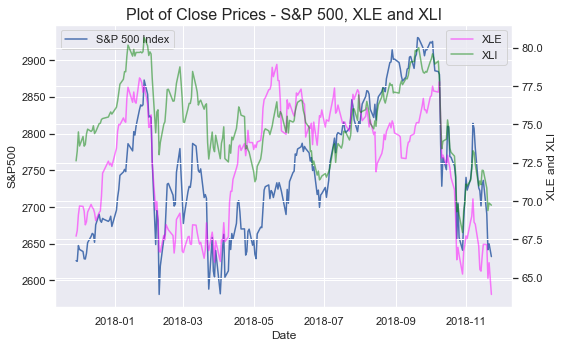

In [68]:
# Plot Time Series Closing Prices

fig, ax1 = plt.subplots(figsize=(8,5))

plt.title('Plot of Close Prices - S&P 500, XLE and XLI', fontsize=16)

ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('S&P500', fontsize=12)
ax1.plot(data_df.Date, data_df['S&P 500 Closing price'], label='S&P 500 Index')
ax1.tick_params(axis='y')
plt.legend(loc='best')

ax2 = ax1.twinx()  

ax2.set_ylabel('XLE and XLI', fontsize=12) 
ax2.plot(data_df.Date, data_df['XLE Closing price'], label='XLE', color = 'magenta', alpha=0.5)
ax2.plot(data_df.Date, data_df['XLI Closing price'], label='XLI', color = 'green', alpha=0.5)
ax2.tick_params(axis='y')
plt.legend()

fig.tight_layout() 
plt.show()

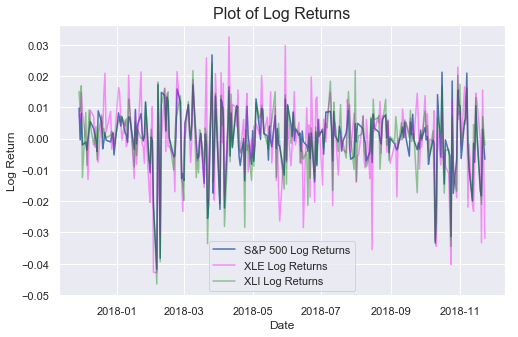

In [69]:
# Plot Log Returns

plt.figure(figsize= (8,5))

plt.plot(data_df['Date'],
         data_df['S&P500 Ret'], label='S&P 500 Log Returns')
plt.plot(data_df['Date'],
         data_df['XLE Ret'], label='XLE Log Returns',color = 'magenta', alpha=0.4)
plt.plot(data_df['Date'],
         data_df['XLI Ret'], label='XLI Log Returns',color = 'green', alpha=0.4)
plt.title('Plot of Log Returns', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Log Return', fontsize=12)
plt.legend()

plt.show()

### Daily and Annualized Standard Deviation of Returns

In [70]:
XLE_std_daily = data_stats['XLE Ret'][2]
XLE_std_annualized = np.round(XLE_std_daily * np.sqrt(252),4)

XLI_std_daily = data_stats['XLI Ret'][2]
XLI_std_annualized = np.round(XLI_std_daily * np.sqrt(252),4)

SP500_std_daily = data_stats['S&P500 Ret'][2]
SP500_std_annualized = np.round(SP500_std_daily * np.sqrt(252),4)

In [71]:
print('Daily Standard Deviation')
print('             Absolute', 'Percentage')
print('=================================')
print('XLE:        ', np.round(XLE_std_daily,4), '   ', round(XLE_std_daily*100, 2),'%')
print('XLI:        ', np.round(XLI_std_daily,4), '   ', round(XLI_std_daily*100, 2),'%')
print('S&P 500:    ', np.round(SP500_std_daily,4), '   ', round(SP500_std_daily*100, 2),'%')

Daily Standard Deviation
             Absolute Percentage
XLE:         0.0128     1.28 %
XLI:         0.0108     1.08 %
S&P 500:     0.0094     0.94 %


In [72]:
print('Anualized Standard Deviation')
print('             Absolute', 'Percentage')
print('=================================')
print('XLE:        ', XLE_std_annualized, '  ', round(XLE_std_annualized*100, 2),'%')
print('XLI:        ', XLI_std_annualized, '  ', round(XLI_std_annualized*100, 2),'%')
print('S&P 500:    ', SP500_std_annualized, '  ', round(SP500_std_annualized*100, 2),'%')

Anualized Standard Deviation
             Absolute Percentage
XLE:         0.2032    20.32 %
XLI:         0.1712    17.12 %
S&P 500:     0.1486    14.86 %


### Expected Return using Capital Asset Pricing Model (CAPM)

The Expected return for each asset using the CAPM is calculated as follows:

$$ E(R_i )=R_f+\beta(R_m-R_f)$$

Where:
       
$ E(R_i)$ is the expected return for the upcoming year of the asset

$ R_f $ is the risk-free rate of return = 2.25%

$ \beta $ is the Beta Value of an asset = 1.07 for XLE and 1.06 for XLI

$ R_m $ is the is the Market Rate of Return = 9.0%


In [73]:
# Defined Variables
beta_xle = 1.07 #Beta Value of XLE
beta_xli = 1.06 #Beta Value of XLI
risk_free_rate = 0.0225 # Risk Free Rate
market_return = 0.09 #Market Return
market_std = 0.15 #Market Standard Deviation

In [74]:
# Expected Return of XLE
ret_xle = risk_free_rate + beta_xle * (market_return - risk_free_rate)

# Expected Return of XLI
ret_xli = risk_free_rate + beta_xli * (market_return - risk_free_rate)

# Expected Return of S&P 500
ret_sp500 = risk_free_rate + 1 * (market_return - risk_free_rate) #Market beta is 1

In [75]:
print('Expected Returns')
print('============================')
print('XLE:                ', np.round(ret_xle,4)*100,'%')
print('XLI:                ', np.round(ret_xli,4)*100,'%')
print('S&P 500:            ', np.round(ret_sp500,4)*100,'%')

Expected Returns
XLE:                 9.47 %
XLI:                 9.4 %
S&P 500:             9.0 %


### Correlation of returns

In [76]:
ret_corr = data_df[['XLE Ret', 'XLI Ret']].corr()

In [77]:
ret_corr

,XLE Ret,XLI Ret
XLE Ret,1.00000,0.65965
XLI Ret,0.65965,1.00000


In [78]:
corr_value = np.round(ret_corr['XLE Ret'][1],3)
print('The Correlation between the two sectors is: ', corr_value)

The Correlation between the two sectors is:  0.66


### Effifient Frontier

Construct the Efficient Frontier of the two ETFs using the different weight combinations

In [79]:
#Define the weights for the various portfolio combinations
xle_weights = np.linspace(0,100,11)
xli_weights = np.linspace(100,0,11)

#Put the Weights Combinations in a Data Frame
weights_df = DataFrame()
weights_df['XLE Weight'] = xle_weights
weights_df['XLI Weight'] = xli_weights

In [80]:
weights_df

,XLE Weight,XLI Weight
0,0.0,100.0
1,10.0,90.0
2,20.0,80.0
3,30.0,70.0
4,40.0,60.0
5,50.0,50.0
6,60.0,40.0
7,70.0,30.0
8,80.0,20.0
9,90.0,10.0


### Computing Returns and Volatility for Each Weights Combination

Portfolio Returns is calculated as a sum of the individual ETFs weighted returns

$$ R_p = w_1 * R_1+ w_2 * 𝑅_2 $$

Where:

$ R_p $ is the Expected Portfolio Returns

$ R_1 $ and $ R_2 $ are the Expected Returns for the two ETFs

$ w_1 $ and $ 𝑤_2 $ are the respective weights of the two ETFs

The Portfolio Volatilitty is calculated using the individual volatilities as 

$$ \sigma_p = \sqrt{w_1^2\sigma_1^2 + w_2^2\sigma_2^2 + 2w_1\sigma_1w_2\sigma_2\rho_{12}}$$

Where:

$ \sigma_p $ is the Portfolio Volatility

$ \sigma_1 $ and $ \sigma_2 $ are the respective Volatilities for the two ETFs

$ w_1 $ and $ w_2 $ are the respective weights for the two ETFs

$ \rho_{12} $ is the correlation between the two ETFs in the portfolio.

In [81]:
#Create a Portfolio Data Frame
portfolio = weights_df.copy()

#Volatilities
xle_vol = XLE_std_annualized
xli_vol = XLI_std_annualized

#Expected Returns and Correlation
er_xle = ret_xle #XLE Expected Returns
er_xli = ret_xli #XLI Expected Returns
cor = corr_value #Correlation of the two ETFs

In [82]:
#Compure Returns and Volatility for each combination

#Portfolio Return
portfolio['Portfolio Returns'] = ((portfolio['XLE Weight']*er_xle) + 
                              (portfolio['XLI Weight']*er_xli))

#Portfolio Volatility
portfolio['Volatility'] = np.sqrt(((portfolio['XLE Weight'])**2 * xle_vol**2) + 
                              ((portfolio['XLI Weight'])**2 * xli_vol**2) +
                              (2 * (portfolio['XLE Weight']) * xle_vol *
                              (portfolio['XLI Weight']) * xli_vol) * cor)

In [83]:
portfolio

,XLE Weight,XLI Weight,Portfolio Returns,Volatility
0,0.0,100.0,9.40500,17.120000
1,10.0,90.0,9.41175,16.818545
2,20.0,80.0,9.41850,16.660385
3,30.0,70.0,9.42525,16.649606
4,40.0,60.0,9.43200,16.786490
5,50.0,50.0,9.43875,17.067486
6,60.0,40.0,9.44550,17.485647
7,70.0,30.0,9.45225,18.031433
8,80.0,20.0,9.45900,18.693668
9,90.0,10.0,9.46575,19.460469


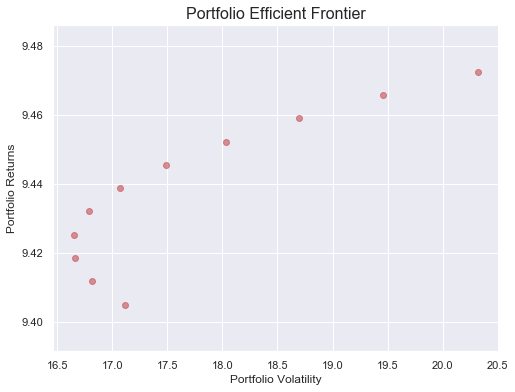

In [84]:
#Plot of the Portfolio Efficient Frontier

plt.figure(figsize= (8,6))

plt.title('Portfolio Efficient Frontier', fontsize=16)
plt.scatter(portfolio['Volatility'], 
            portfolio['Portfolio Returns'], 
            color='r', alpha=0.6)

plt.xlabel('Portfolio Volatility', fontsize=12)
plt.ylabel('Portfolio Returns', fontsize=12)

plt.show()

### Portfolio Selection

In [85]:
#Define the Portfolio Constraints
Vol_threshold = 16.8
return_threshold = 9.43
n = len(portfolio)

In [86]:
# Data ponts for Returns and Volatility
points = []
for i, j in zip(portfolio['Volatility'], portfolio['Portfolio Returns']):
    points.append((i,j))                       

# Portfolio Weights, (xle, xli)
w = []
for i, j in zip(portfolio['XLE Weight'], portfolio['XLI Weight']):
    w.append((i, j))

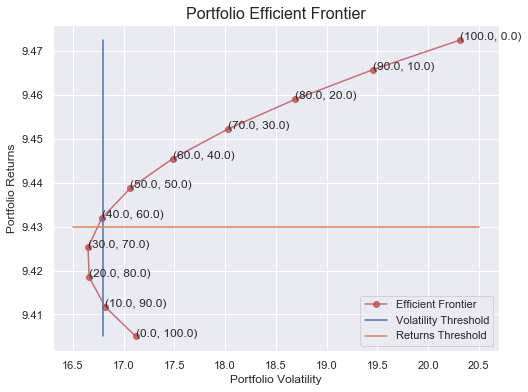

In [87]:
#Plot of the Portfolio Efficient Frontier with the Constraints

plt.figure(figsize= (8,6))

plt.title('Portfolio Efficient Frontier', fontsize=16)

plt.plot(portfolio['Volatility'], portfolio['Portfolio Returns'],
         '-or', alpha=0.8, label='Efficient Frontier')

plt.plot(n * [Vol_threshold], portfolio['Portfolio Returns'],
        label = 'Volatility Threshold')

plt.plot(np.linspace(16.5,20.5,11), n * [return_threshold],
        label = 'Returns Threshold')

for i, j in zip(points, w):
    plt.text(i[0],i[1],j)

plt.xlabel('Portfolio Volatility', fontsize=12)
plt.ylabel('Portfolio Returns', fontsize=12)

plt.legend()
plt.show()

### Portfolio Performance

#### Compare the Performance of the Selected Portfolio meeting the Defined Criteria

#### Portfolio meeting the defined criteria is 40% XLE and 60% XLI

#### Returns and Risk

In [88]:
#Portolio Returns
port_ret = float(portfolio['Portfolio Returns'][portfolio['XLE Weight']==40])

#Portolio Volatility
port_vol = float(portfolio['Volatility'][portfolio['XLE Weight']==40])

In [89]:
#S&P 500 Returns
sp500_ret = market_return * 100

#S&P 500 Volatility
sp500_vol = market_std * 100

In [90]:
performance_df = DataFrame([[port_ret, port_vol], [sp500_ret, sp500_vol]], 
                           index = ['Portfolio', 'S&P 500'], columns = ['Returns', 'Volatility'])

In [91]:
performance_df

,Returns,Volatility
Portfolio,9.432,16.78649
S&P 500,9.000,15.00000


#### Risk Adjusted Returns

In [92]:
#Risk-Free Rate
risk_free = risk_free_rate

In [93]:
"""Treynor Measure"""

#Asset Beta
beta_xle = 1.07 #Beta Value of XLE
beta_xli = 1.06 #Beta Value of XLI

#Portfolio weights
w_xle = 0.4
w_xli = 0.6

#Portfolio Beta
beta_portfolio = beta_xle * w_xle + beta_xli * w_xli

#S&P 500 Beta
beta_sp500 = 1

#Treynor Measure Ratio - Portfolio
tr_portfolio = (port_ret - risk_free)/ beta_portfolio

#Treynor Measure Ratio -S&P 500
tr_sp500 = (sp500_ret - risk_free)/ beta_sp500

#Treynor Measure Ratios
trm_ratios = np.array([tr_portfolio, tr_sp500])

trm_ratios

array([8.84351504, 8.9775    ])

In [94]:
"""Sharpe Ratios"""

#Portfolio Sharpe Ratio
sr_portfolio = (port_ret - risk_free)/ port_vol

#S&P 500 Sharpe Ratio
sr_sp500 = (sp500_ret - risk_free)/ sp500_vol

#Sharpe Ratios

sharpe_ratios = np.array([sr_portfolio, sr_sp500])

sharpe_ratios

array([0.56054005, 0.5985    ])

In [95]:
"""Risk Adjusted Returns Measures"""
performance_measures = DataFrame([trm_ratios, sharpe_ratios], 
                                 index = ['Treynor', 'Sharpe'],
                                columns = ['Portfolio', 'S&P 500'])

performance_measures = performance_measures.T

In [96]:
performance_measures

,Treynor,Sharpe
Portfolio,8.843515,0.56054
S&P 500,8.977500,0.59850


The portfolio performance does not beat the benchmark S&P 500 owing to the fact that the Sharpe Ratio and the Treynor Measure Ratio for the S&P 500 are greater than our selected portfolio